In [1]:
# %pip install openpyxl

In [2]:
import pandas as pd

fname = "/ASD/ahsan_projects/braintypicality/dataset/BASC2_PRSC_6yr_20190320_ec.xlsx"
basc_df = pd.read_excel(fname)
print(f"Found {len(basc_df)} samples")
basc_df.head(3)

Found 430 samples


,Case,gestno,subid,visit,prsc2_6yr_babyid,prsc2_6yr_info___1,prsc2_6yr_comments,prsc2_6yr_date,prsc2_6yr_item1,prsc2_6yr_item2,...,prsc2_6yr_res_raw,prsc2_6yr_res_gs_t,prsc2_6yr_res_gs_p,prsc2_6yr_akl_sum_t,prsc2_6yr_akl_gs_t,prsc2_6yr_akl_gs_p,prsc2_6yr_f_raw,prsc2_6yr_cons_raw,prsc2_6yr_ptrn_raw,basc2_prsc6yr_complete
0,C0001-1-1,1,C0001-1,7,1,0,NaN,2010-06-01,A,N,...,24.0,51.0,51.0,250.0,50.0,46.0,0,13,107,2
1,C0005-1-1,2,C0005-1,7,1,0,NaN,2010-04-12,N,O,...,14.0,33.0,6.0,165.0,30.0,3.0,1,6,82,2
2,C0005-1-2,2,C0005-1,7,2,0,NaN,2010-04-12,S,N,...,12.0,29.0,2.0,155.0,27.0,2.0,1,6,89,2


In [3]:
# list(basc_df.columns)

In [4]:
import re

basc_t_score_cols = [c for c in basc_df.columns if re.match(r"(?!.*_sum).*_t$", c)]
len(basc_t_score_cols)

25

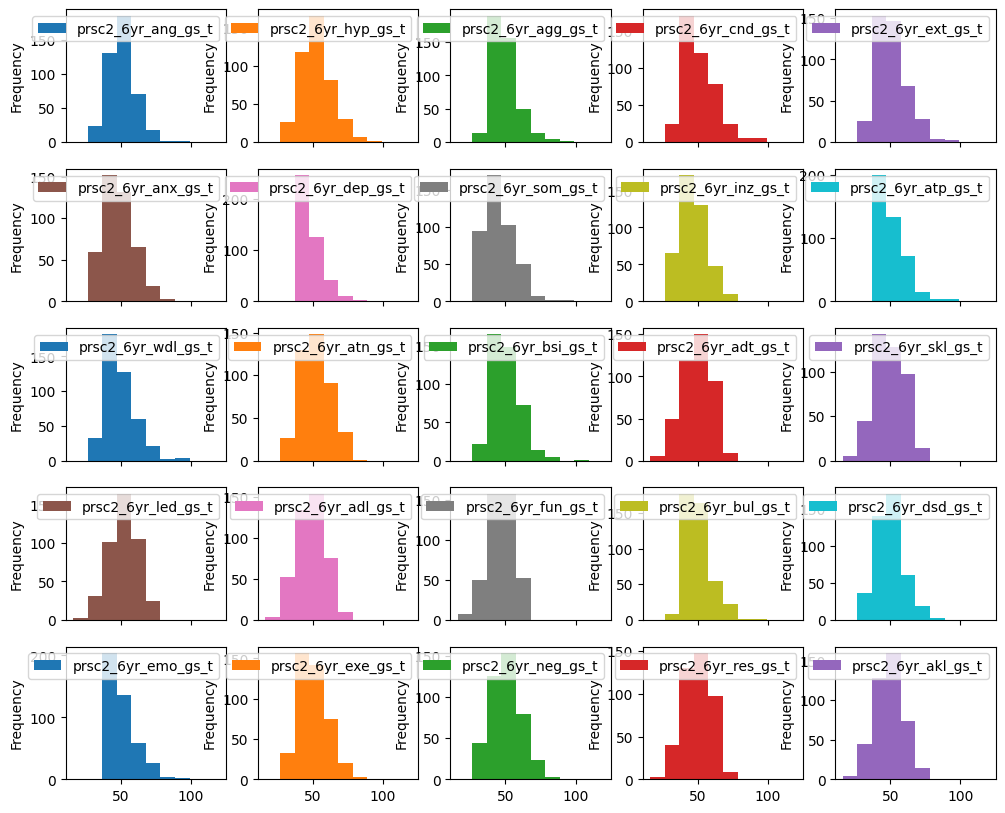

In [5]:
basc_df[basc_t_score_cols].plot(kind='hist', subplots=True, layout=(5,5), figsize=(12,10));

In [6]:
higher_is_risk = [
    'prsc2_6yr_ext_gs_t', # Externalizing Problems
    'prsc2_6yr_inz_gs_t', # Internalizing Problems
    'prsc2_6yr_bsi_gs_t', # Behavioral Symptoms Index
]

lower_is_risk = [
    'prsc2_6yr_akl_gs_t' # Adaptive Skills
]

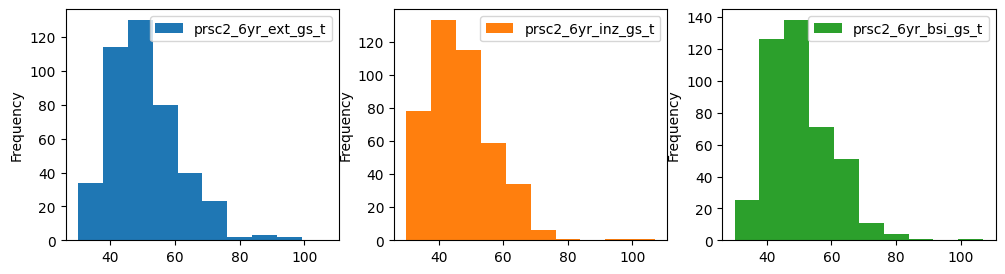

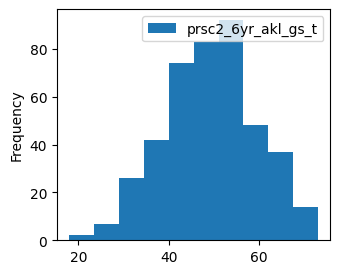

In [7]:
basc_df[higher_is_risk].plot(kind='hist', subplots=True, layout=(1,3), figsize=(12,3));
basc_df[lower_is_risk].plot(kind='hist', subplots=True, layout=(1,3), figsize=(12,3));

In [8]:
basc_significant_mask = (basc_df[higher_is_risk] < 70).all(1) & (basc_df[lower_is_risk] > 30).all(1)
basc_inliers = basc_df[basc_significant_mask]
print(f"BASC Inliers: {len(basc_inliers)}")

BASC Inliers: 379


In [9]:
fname = "/ASD/ahsan_projects/braintypicality/dataset/Brief6yr_20190320_ec.xlsx"
brief_df = pd.read_excel(fname)
print(f"Found {len(brief_df)} samples")
brief_df.head(3)

Found 493 samples


,Case,gestno,subid,visit,brief6yr_babyid,brief6yr_info___1,brief6yr_comments,brief6yr_date,brief6yr_sdate,brief6yr_sinit,...,brief6yr_mi_t,brief6yr_mi_pcnt,brief6yr_gec_rs,brief6yr_gec_t,brief6yr_gec_pcnt,brief6yr_negscl_sum,brief6yr_negscl_class,brief6yr_incscl_ds,brief6yr_incscl_class,brief6yr_complete
0,C0001-1-1,1,C0001-1,7,1,0,NaN,2010-06-01,2010-06-03,NMP,...,56.0,78.0,125.0,57.0,79.0,0.0,1.0,3.0,1.0,1
1,C0005-1-1,2,C0005-1,7,1,0,NaN,2010-04-12,2010-04-15,NMP,...,58.0,84.0,144.0,62.0,85.0,2.0,1.0,0.0,1.0,1
2,C0005-1-2,2,C0005-1,7,2,0,NaN,2010-04-12,2010-04-15,NMP,...,58.0,84.0,141.0,60.0,84.0,0.0,1.0,0.0,1.0,1


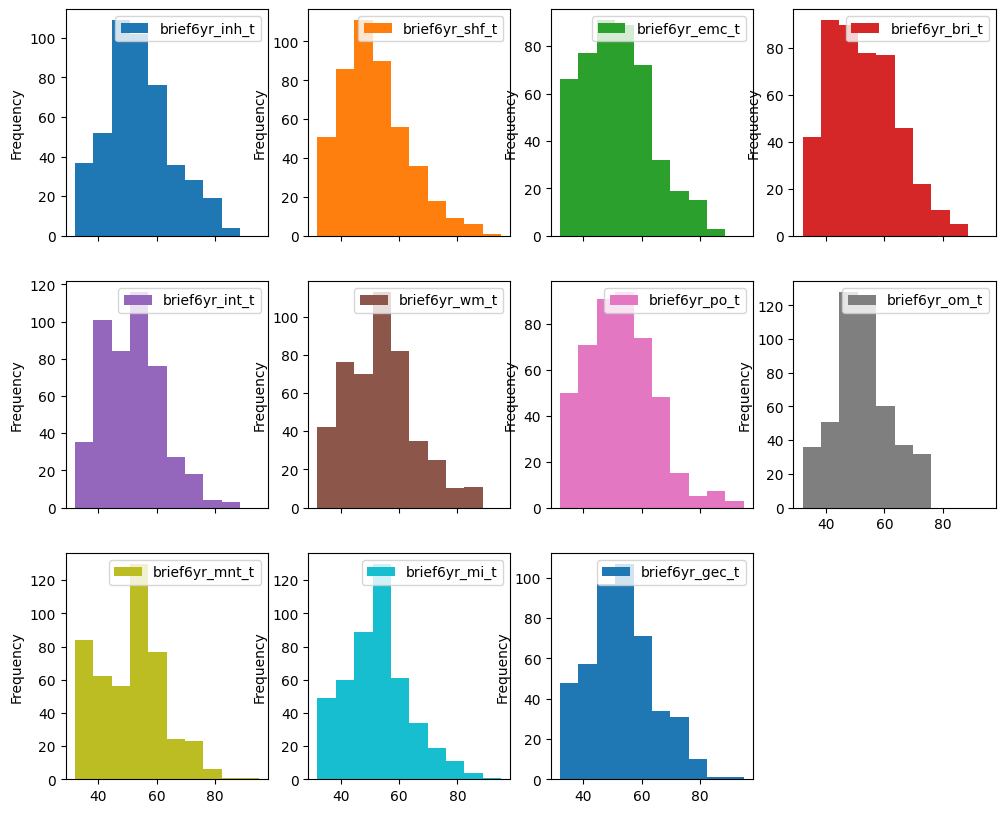

In [10]:
brief_t_score_cols = [c for c in brief_df.columns if re.match(r"(?!.*_sum).*_t$", c)]
brief_df[brief_t_score_cols].plot(kind='hist', subplots=True, layout=(3,4), figsize=(12,10));

In [11]:
brief_t_score_cols

['brief6yr_inh_t',
 'brief6yr_shf_t',
 'brief6yr_emc_t',
 'brief6yr_bri_t',
 'brief6yr_int_t',
 'brief6yr_wm_t',
 'brief6yr_po_t',
 'brief6yr_om_t',
 'brief6yr_mnt_t',
 'brief6yr_mi_t',
 'brief6yr_gec_t']

In [12]:
summary_scores = [
    'brief6yr_gec_t', # Global Executive Composite (GEC)
    'brief6yr_bri_t', # Behavioral Regulation Index (BRI)
    'brief6yr_mi_t',  # Metacognition Index (MI)
]

In [13]:
brief_significant_mask = (brief_df[summary_scores] < 70).all(1)
brief_inliers = brief_df[brief_significant_mask]
print(f"BRIEF Inliers: {len(brief_inliers)}")

BRIEF Inliers: 397


In [14]:
combined_inliers = set(basc_inliers.Case).intersection(set(basc_inliers.Case))
combined_inliers = pd.Series(list(combined_inliers))
combined_inliers

0      T0062-1-2
1      T0067-1-2
2      C0173-1-1
3      T0058-1-1
4      C0141-1-1
         ...    
374    T0046-2-2
375    T0033-1-1
376    T0180-1-2
377    C0177-1-1
378    C0269-1-1
Length: 379, dtype: object

In [15]:
inlier_keys = "EBDS" + combined_inliers
inlier_keys.to_csv('ebds_brief_basc_passing_keys.txt', header=None, index=None)